In [69]:
from advectionGP.models import AdvectionDiffusionModel
from advectionGP.sensors import FixedSensorModel
from advectionGP.kernels import EQ

import numpy as np
import matplotlib.pyplot as plt

#X = np.array([[17,18,10,10]])
#y = np.array([12])
tlocL = np.linspace(1,7,5)
tlocU = tlocL+1
#tlocL = np.linspace(1,8,9)
xloc=np.linspace(0.5,19,5)
yloc=np.linspace(0.5,19,5)
sensN = len(xloc)*len(yloc)
obsN = len(tlocU)
X= np.zeros((obsN*sensN,4))
X[:,0] = np.asarray(np.meshgrid(tlocU,xloc,yloc)).reshape(3,sensN*obsN)[0]
X[:,2] = np.asarray(np.meshgrid(tlocU,xloc,yloc)).reshape(3,sensN*obsN)[1]
X[:,3] = np.asarray(np.meshgrid(tlocU,xloc,yloc)).reshape(3,sensN*obsN)[2]
X[:,1] = X[:,0]+1

N_feat=15
boundary = ([0,0,0],[20,20,20])
k = EQ(1.0, 2.0)
sensors = FixedSensorModel(X,1)
m = AdvectionDiffusionModel(resolution=[100,50,50],boundary=boundary,N_feat=N_feat,noiseSD=.05,kernel=k,sensormodel=sensors,u=0.001,k_0=0.05)

dt,dx,dy,dx2,dy2,Nt,Nx,Ny = m.getGridStepSize()

z=np.random.normal(0,1.0,N_feat)
source=m.computeSourceFromPhi(z)
conc=m.computeConcentration(source)
X=m.computeModelRegressors()
y= m.computeObservations()
varZ, meanZ = m.computeZDistribution(X,y)
source2 = m.computeSourceFromPhi(meanZ)


getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!
getPhi!


In [73]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=meanZ, cov=varZ)
var.pdf([z-np.diag(varZ),z+np.diag(varZ)])

array([2.51793547e-111, 2.01008650e-111])

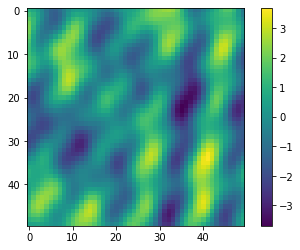

In [42]:
plt.imshow(source[0])
plt.colorbar()

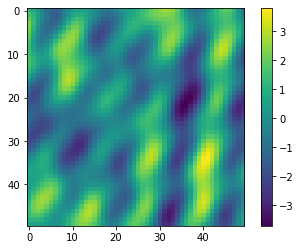

In [43]:
plt.imshow(source2[0])
plt.colorbar()

In [44]:
meanZ,z

(array([ 0.17063868,  0.01503892,  0.28565621,  0.59581101,  0.03647126,
         1.18054653,  1.35023732,  0.05747896, -1.57586152,  2.50888373,
        -0.53337751,  0.04155468, -0.84574713, -0.23687887, -0.82117546]),
 array([ 0.13695321, -0.12219261,  0.19472492,  0.66910338,  0.03348672,
         1.18836597,  1.41375295,  0.07198461, -1.49728802,  2.3231847 ,
        -0.40015541,  0.02927117, -0.87288997, -0.37160834, -0.84812461]))

In [45]:
(m.noiseSD**2)*np.linalg.inv(varZ)@meanZ

array([ 2.82360278e-01, -2.26674904e+01, -9.46831148e+01,  1.25062757e+01,
       -7.05098353e+01,  3.52203912e+01,  6.69170451e+01,  3.14466998e+01,
       -4.33397190e+02,  4.88550284e+01, -1.08638702e+02, -4.03592374e+01,
       -1.36966014e+02, -4.97551821e+01, -1.08421835e+02])

In [46]:
y.shape

(125,)

In [47]:
X.shape

(15, 125)

In [64]:
varZ, meanZ = m.computeZDistribution(X,y)

In [65]:
varZ

array([[ 2.13935374e-04, -1.25055244e-06,  4.67191357e-06,
        -4.51935286e-06, -1.45914605e-06,  7.85719499e-06,
         1.51963393e-06, -1.99606458e-05,  1.23811700e-06,
        -9.14596124e-07, -1.55120732e-06, -1.81858068e-05,
         1.41438855e-06, -6.67022400e-06, -4.83059073e-06],
       [-1.25055244e-06,  6.07392270e-05, -7.30036455e-06,
         1.07585928e-06, -9.56496447e-06, -6.31178768e-06,
         4.49816999e-06,  4.26626772e-06, -4.25603531e-07,
        -1.41097557e-06,  7.08703580e-06, -1.94777105e-06,
        -4.00436331e-06,  1.86587385e-06,  5.26054661e-07],
       [ 4.67191357e-06, -7.30036455e-06,  4.10911456e-05,
        -5.27877495e-06, -1.66823686e-06,  5.84862722e-06,
        -4.13777508e-07, -1.15984880e-05, -3.14355539e-06,
        -9.24847929e-06, -2.89255022e-05,  1.12446239e-06,
        -2.04991700e-06, -2.43628750e-06, -1.50517635e-06],
       [-4.51935286e-06,  1.07585928e-06, -5.27877495e-06,
         2.98071281e-04, -1.45425604e-06, -5.10992541

In [66]:
varZ, meanZ = m.computeZDistribution(X,np.ones(len(y)))
source2 = m.computeSourceFromPhi(meanZ)
conc2=m.computeConcentration(source2)

getPhi!


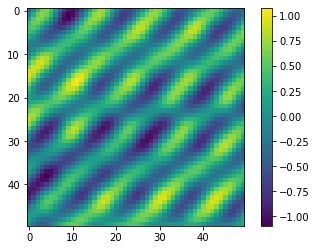

In [67]:
plt.imshow(source2[30])
plt.colorbar()

In [68]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=meanZ, cov=varZ)
var.pdf(z)

0.0